In [1]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils as ut
from visual_config import *

from matplotlib import font_manager
from scipy.stats import pearsonr, spearmanr

for font in font_manager.findSystemFonts("figures/Atkinson_Typeface/"):
    font_manager.fontManager.addfont(font)
    
set_visual_style()

In [30]:
labels = scipy.io.loadmat(
    "results/communication_models/parcel_list_caio_ctx_glasser_sctx_fs14.mat",
    simplify_cells=True,
    squeeze_me=True,
    chars_as_strings=True,
)['parcel_list']
connectome = pd.read_csv('results/communication_models/SC_Seguin_et_al_2023.txt',sep=',',header=None)
connectome.columns = labels
connectome.index = labels

normalized_values = ut.spectral_normalization(1, connectome.values)
connectome = pd.DataFrame(normalized_values, columns=connectome.columns, index=connectome.index)


In [31]:
connectome

,R_V1_ROI,R_MST_ROI,R_V6_ROI,R_V2_ROI,R_V3_ROI,R_V4_ROI,R_V8_ROI,R_4_ROI,R_3b_ROI,R_FEF_ROI,...,Left-Hippocampus,Left-Amygdala,Left-Accumbens-area,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area
R_V1_ROI,0.000000,0.000332,0.042770,0.418207,0.191470,0.050441,0.006121,0.000000,0.000000,0.000000,...,0.000760,0.0,0.0,0.005044,0.000390,0.009508,0.001077,0.009112,0.002353,0.000318
R_MST_ROI,0.000332,0.000000,0.001348,0.000311,0.000696,0.002383,0.000000,0.000538,0.000000,0.001722,...,0.000000,0.0,0.0,0.001009,0.000000,0.002117,0.000000,0.001115,0.000000,0.000000
R_V6_ROI,0.042770,0.001348,0.000000,0.047591,0.030909,0.008633,0.002622,0.000000,0.000000,0.000000,...,0.001297,0.0,0.0,0.004127,0.000000,0.005348,0.001886,0.007193,0.001750,0.000000
R_V2_ROI,0.418207,0.000311,0.047591,0.000000,0.223083,0.077368,0.010308,0.000000,0.000000,0.000000,...,0.000723,0.0,0.0,0.004528,0.000392,0.008387,0.000979,0.009549,0.002317,0.000352
R_V3_ROI,0.191470,0.000696,0.030909,0.223083,0.000000,0.202722,0.027248,0.000000,0.000000,0.000000,...,0.000687,0.0,0.0,0.004807,0.000397,0.009245,0.001307,0.006346,0.002374,0.000380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Right-Putamen,0.009508,0.002117,0.005348,0.008387,0.009245,0.008974,0.002857,0.029984,0.032917,0.007762,...,0.000000,0.0,0.0,0.003112,0.006294,0.000000,0.003284,0.002807,0.001092,0.033069
Right-Pallidum,0.001077,0.000000,0.001886,0.000979,0.001307,0.001183,0.000000,0.022280,0.018356,0.005672,...,0.000000,0.0,0.0,0.000957,0.000815,0.003284,0.000000,0.001065,0.000000,0.000000
Right-Hippocampus,0.009112,0.001115,0.007193,0.009549,0.006346,0.006505,0.005649,0.008393,0.005852,0.001660,...,0.000000,0.0,0.0,0.008648,0.000762,0.002807,0.001065,0.000000,0.028408,0.000000
Right-Amygdala,0.002353,0.000000,0.001750,0.002317,0.002374,0.002782,0.002510,0.000542,0.000675,0.000000,...,0.000000,0.0,0.0,0.002083,0.000000,0.001092,0.000000,0.028408,0.000000,0.000000


<AxesSubplot:>

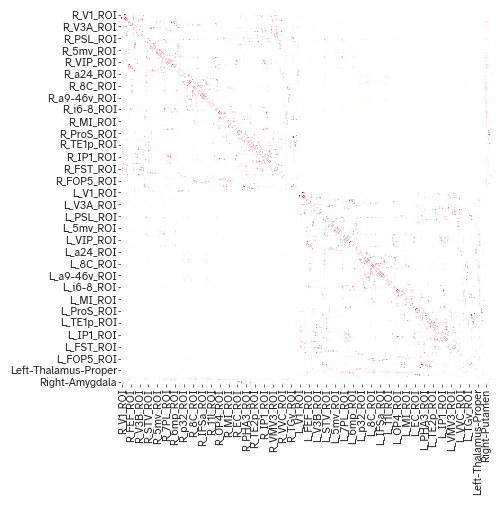

In [32]:
sns.heatmap(connectome, cmap=white_red_mono, cbar=False, square=True, )

In [55]:
omegas = np.linspace(0.2,0.8,4)
sars = np.zeros((connectome.shape[0],connectome.shape[1],4))
for index, omega in enumerate(omegas):
    sars[:,:,index] = ut.sar_model(omega = omega, adjacency_matrix=connectome.values)
    np.savetxt(f'results/communication_models/glasser_sar_omega_{round(omegas[index],2)}.txt', sars[:,:,index], delimiter=',')

In [67]:
test = pd.read_csv('results/communication_models/glasser_sar_omega_0.8.txt',sep=',',header=None)


<AxesSubplot:>

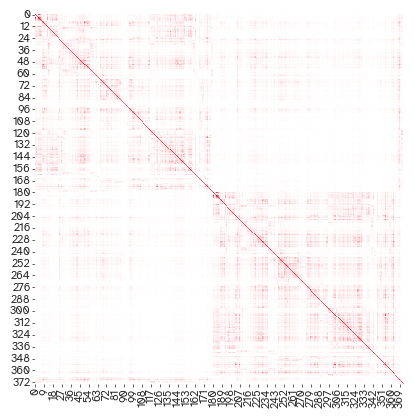

In [68]:
sns.heatmap(test, cmap=white_red_mono, cbar=False, square=True, )